# Proyecto, Camilo Rey
# Introducción
Para el desarrollo del proyecto se implementó un dataset de un banco portugués, que implemento marketing directo mediante llamadas telefónicas, con el objetivo de predecir si los clientes se suscribirían a uno de sus productos, en este caso depósito a plazo bancario.

- Numero de atributos: 17
- Variable de interes: 1 (depósito a plazo)
- Area de estudio: Empresa financiera

Sobre el dataset se puede decir que es un aprendizaje supervisado, ya que el motivo del estudio es poder predecir si un cliente se suscribirá al depósito a plazo de la entidad bancaria, para ello podemos implementar un modelo que relacione los atributos que permitan aproximar la medición futura de los datos, en este caso bajo el estudio y la información recolectada, poder implementar un modelo que permita predecir si un cliente se suscribirá al instrumento financiero del banco y qué factores son relevantes para poder identificar estos potenciales individuos.

Por otro lado, sería un problema de clasificación teniendo en cuenta que sus etiquetas son discretas, ¿Se suscribirá un cliente a un depósito a plazo?, SI o NO.

En este caso sería óptimo implementar clustering, dado que por medio de este podríamos formar grupos homogéneos de clientes potenciales, los cuales compartirían características similares que permitirán identificar un segmento objetivo para el ofrecimiento de su instrumento financiero y de esta manera tener una repuesta positiva en su mayor parte sobre la suscripción al depósito a plazo.

In [274]:
!pip install dfply
!pip install altair vega_datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from dfply import *
from sklearn.impute import KNNImputer
!pip install pingouin
import pingouin as pg
from sklearn.linear_model import LinearRegression
!pip install -U -q PyDrive
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
from  scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [326]:
from sklearn.ensemble import StackingClassifier

In [276]:
bank = pd.read_csv('/content/drive/MyDrive/ESTADÍSTICA/bank-full.csv', delimiter = ';')

In [277]:
bank['y'].value_counts() / bank['y'].value_counts().sum() # El conjunto esta desbalanceado

no     0.883015
yes    0.116985
Name: y, dtype: float64

# Variables a seleccionar.

En un principio, fueron descartadas las variables 'day' y 'month' dado que estas incluyen el efecto del tiempo en la base de datos, ejercicio que no es de interés en este momento.

In [278]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [279]:
Variables = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan',
 'contact', 'poutcome']
# Cuantitativas: Posición 0 a 5
# Cualitativas: Posición 6 a 13
Variables[0:5] ; Variables[6:13]

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

## Variables cuantitativas

A continuación, se realiza una prueba ANOVA con la finalidad de contrastar si la media de las diferentes variables cualitativas varía dependiendo si se suscribirá el cliente a depósito a plazo o no. Con lo cual se encontró que los promedios de todas las variables cualitativas varían dependiendo de la modalidad que tome la variable cualitativa, en este mismo sentido, serán tenidas en cuentas para la explicación de la variable de interés.

### Age


  Source  ddof1  ddof2          F         p-unc       np2
0      y      1  45209  28.625233  8.825644e-08  0.000633
y
no     40.838986
yes    41.670070
Name: age, dtype: float64


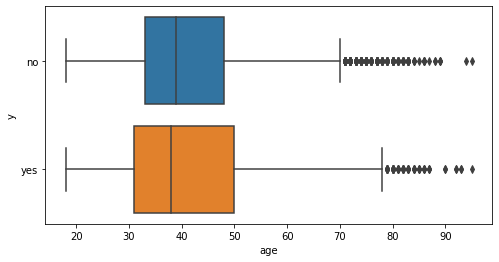

In [280]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = Variables[0], y= 'y', data = bank, ax=ax)
print(pg.anova(data = bank, dv = Variables[0], between = 'y'))
print(bank.groupby(['y'])[Variables[0]].mean())

### Balance

  Source  ddof1  ddof2           F         p-unc       np2
0      y      1  45209  126.572276  2.521114e-29  0.002792
y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64


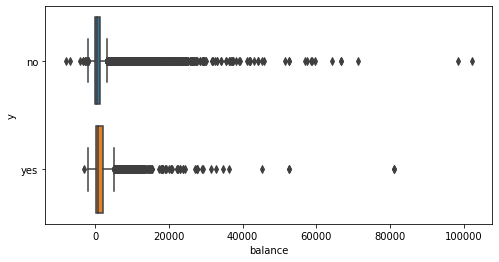

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = Variables[1], y= 'y', data = bank, ax=ax)
print(pg.anova(data = bank, dv = Variables[1], between = 'y'))
print(bank.groupby(['y'])[Variables[1]].mean())

### Duration

  Source  ddof1  ddof2            F  p-unc       np2
0      y      1  45209  8333.761148    0.0  0.155647
y
no     221.182806
yes    537.294574
Name: duration, dtype: float64


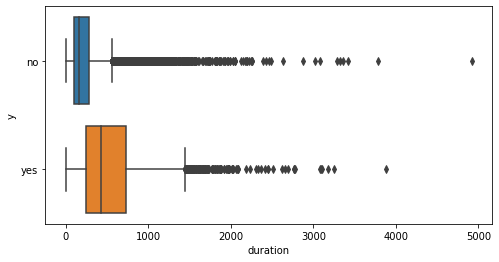

In [282]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = Variables[2], y= 'y', data = bank, ax=ax)
print(pg.anova(data = bank, dv = Variables[2], between = 'y'))
print(bank.groupby(['y'])[Variables[2]].mean())

### campaign

  Source  ddof1  ddof2           F         p-unc       np2
0      y      1  45209  243.358404  1.012347e-54  0.005354
y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64


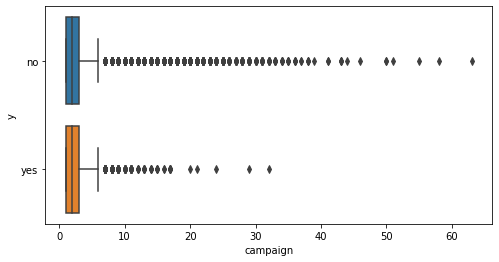

In [283]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = Variables[3], y= 'y', data = bank, ax=ax)
print(pg.anova(data = bank, dv = Variables[3], between = 'y'))
print(bank.groupby(['y'])[Variables[3]].mean())

### pdays

  Source  ddof1  ddof2           F          p-unc       np2
0      y      1  45209  490.696563  3.790553e-108  0.010737
y
no     36.421372
yes    68.702968
Name: pdays, dtype: float64


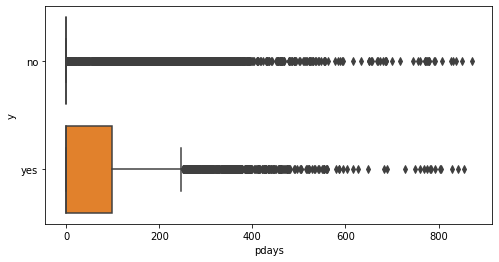

In [284]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = Variables[4], y= 'y', data = bank, ax=ax)
print(pg.anova(data = bank, dv = Variables[4], between = 'y'))
print(bank.groupby(['y'])[Variables[4]].mean())

### previous

  Source  ddof1  ddof2           F         p-unc       np2
0      y      1  45209  396.443989  7.801830e-88  0.008693
y
no     0.502154
yes    1.170354
Name: previous, dtype: float64


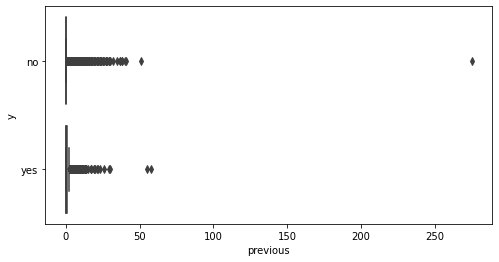

In [285]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = Variables[5], y= 'y', data = bank, ax=ax)
print(pg.anova(data = bank, dv = Variables[5], between = 'y'))
print(bank.groupby(['y'])[Variables[5]].mean())

## Variables cuantitativas

Para analizar las variables cualitativas que estan asociadas con la variable de interes se realizan pruebas $\chi^2$, la cual nos permite constrastar si las variables son independientes o si por el contrario están asociadas de alguna forma. A un nivel de significancia del $5$%, se encontro que todas las variables cualitativas tienen alguna asociación con la variable respuesta.

### Job

In [286]:
print(chi2_contingency(pd.crosstab(bank[Variables[6]], bank['y']))[1])

3.337121944935502e-172


### marital

In [287]:
print(chi2_contingency(pd.crosstab(bank[Variables[7]], bank['y']))[1])

2.1450999986791792e-43


### education

In [288]:
print(chi2_contingency(pd.crosstab(bank[Variables[8]], bank['y']))[1])

1.6266562124072994e-51


### default

In [289]:
print(chi2_contingency(pd.crosstab(bank[Variables[9]], bank['y']))[1])

2.4538606753508344e-06


### housing

In [290]:
print(chi2_contingency(pd.crosstab(bank[Variables[10]], bank['y']))[1])

2.918797605076633e-192


### loan

In [291]:
print(chi2_contingency(pd.crosstab(bank[Variables[11]], bank['y']))[1])

1.665061163492756e-47


### contact

In [292]:
print(chi2_contingency(pd.crosstab(bank[Variables[12]], bank['y']))[1])

1.251738325340638e-225


### poutcome

In [293]:
print(chi2_contingency(pd.crosstab(bank[Variables[13]], bank['y']))[1])

0.0


# Balancear variable de interes
Dado que los grupos de la variable de interes estan muy desbalanceados, se balancea la variable.

In [294]:
y = bank['y'].map({'yes':1,'no':'0'})

In [295]:
y = y.values

In [296]:
job = pd.get_dummies(bank['job'], drop_first= True)
marital = pd.get_dummies(bank['marital'], drop_first= True)
education = pd.get_dummies(bank['education'], drop_first= True)
default = pd.get_dummies(bank['default'], drop_first= True)
housing = pd.get_dummies(bank['housing'], drop_first= True)
loan = pd.get_dummies(bank['loan'], drop_first= True)
contact = pd.get_dummies(bank['contact'], drop_first= True)

In [297]:
X = np.c_[bank[Variables[0:5]], job, marital, education, default, housing, loan, contact]

In [298]:
y = y.astype(int)

In [299]:
target_percentage = 0.5
n_samples = y.shape[0]
n_samples_0 = (y == 0).sum()
n_samples_1 = (y == 1).sum()

n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
n_samples_0_new_per = n_samples_0_new / n_samples_0

filter_ = y == 0
np.random.seed(123)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
filter_ = filter_ & rand_1
filter_ = filter_ | (y == 1)
filter_ = filter_.astype(bool)

In [300]:
X_bal = X[filter_] ; y_bal = y[filter_]

# Ajuste de Algoritmos

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=17)

## Randon Forest

Variando los parámetros, 'n_estimators', 'max_features' y 'max_depth' se estiman diferentes modelos y se calcula la precisión y el accuracy, obteniendo que el modelo con el cual se obtiene un mayor valor de estas métricas es el que es ajustado con:

- n_estimators = 70
- max_features = 10
- max_depth = 10

In [302]:
grillaRF = {'n_estimators': [50,50, 50, 50, 70, 70, 70, 70], 
              'max_features': [10, 10, 20, 20, 10, 10, 20, 20],
              'max_depth': [7,10,7,10,7,10,7,10]} 
precisionRF = []
accuracyRF = []              
grillaRF = pd.DataFrame(grillaRF) ; grillaRF 

n_estimators  max_features  max_depth
0            50            10          7
1            50            10         10
2            50            20          7
3            50            20         10
4            70            10          7
5            70            10         10
6            70            20          7
7            70            20         10

In [303]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][0], 
                             max_features = grillaRF['max_features'][0], 
                             max_depth = grillaRF['max_features'][0])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [304]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][1], 
                             max_features = grillaRF['max_features'][1], 
                             max_depth = grillaRF['max_features'][1])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [305]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][2], 
                             max_features = grillaRF['max_features'][2], 
                             max_depth = grillaRF['max_features'][2])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [306]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][3], 
                             max_features = grillaRF['max_features'][3], 
                             max_depth = grillaRF['max_features'][3])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [307]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][4], 
                             max_features = grillaRF['max_features'][4], 
                             max_depth = grillaRF['max_features'][4])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [308]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][5], 
                             max_features = grillaRF['max_features'][5], 
                             max_depth = grillaRF['max_features'][5])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [309]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][6], 
                             max_features = grillaRF['max_features'][6], 
                             max_depth = grillaRF['max_features'][6])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [310]:
clf = RandomForestClassifier(n_estimators = grillaRF['n_estimators'][7], 
                             max_features = grillaRF['max_features'][7], 
                             max_depth = grillaRF['max_features'][7])
clf.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionRF.append(abs(np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracyRF.append(abs((np.mean(cross_val_score(clf, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [311]:
grillaRF
grillaRF['precision'] = precisionRF
grillaRF['accuracy'] = accuracyRF

In [312]:
grillaRF

n_estimators  max_features  max_depth  precision  accuracy
0            50            10          7   0.807573  0.824189
1            50            10         10   0.809564  0.824309
2            50            20          7   0.803752  0.817854
3            50            20         10   0.806158  0.818094
4            70            10          7   0.809114  0.824787
5            70            10         10   0.809778  0.827178
6            70            20          7   0.808237  0.816779
7            70            20         10   0.806277  0.816420

In [ ]:
RandomForestClassifier(n_estimators = 70, max_features = 10, max_depth = 10)

## SVM

Variando los parámetros, 'gamma', 'C' y 'kernel' se estiman diferentes modelos y se calcula la precisión y el accuracy, obteniendo que el modelo con el cual se obtiene un mayor valor de estas métricas es el que es ajustado con:

- gamma = 1
- C = 1
- kernel = sigmoid


In [313]:
grilla = {'gamma': [1, 1, 1, 1, 2, 2, 2, 2],'C': [1, 1, 2, 2, 1, 1, 2, 2], 
              'kernel': ['rbf', 'sigmoid', 'rbf', 'sigmoid', 'rbf', 'sigmoid', 'rbf', 'sigmoid']}
grilla = pd.DataFrame(grilla)
precisionSVM = []
accuracySVM = []
grilla

gamma  C   kernel
0      1  1      rbf
1      1  1  sigmoid
2      1  2      rbf
3      1  2  sigmoid
4      2  1      rbf
5      2  1  sigmoid
6      2  2      rbf
7      2  2  sigmoid

In [314]:
SVM1 = svm.SVC(gamma = grilla['gamma'][0], C = grilla['C'][0], kernel = grilla['kernel'][0])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [315]:
SVM1 = svm.SVC(gamma = grilla['gamma'][1], C = grilla['C'][1], kernel = grilla['kernel'][1])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [316]:
SVM1 = svm.SVC(gamma = grilla['gamma'][2], C = grilla['C'][2], kernel = grilla['kernel'][2])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [317]:
SVM1 = svm.SVC(gamma = grilla['gamma'][3], C = grilla['C'][3], kernel = grilla['kernel'][3])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [318]:
SVM1 = svm.SVC(gamma = grilla['gamma'][4], C = grilla['C'][4], kernel = grilla['kernel'][4])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [319]:
SVM1 = svm.SVC(gamma = grilla['gamma'][5], C = grilla['C'][5], kernel = grilla['kernel'][5])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [320]:
SVM1 = svm.SVC(gamma = grilla['gamma'][6], C = grilla['C'][6], kernel = grilla['kernel'][6])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [321]:
SVM1 = svm.SVC(gamma = grilla['gamma'][7], C = grilla['C'][7], kernel = grilla['kernel'][7])
SVM1.fit(X_train, y_train)
cantidad = KFold(n_splits=5, random_state=17, shuffle=True)
precisionSVM.append(abs(np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='precision', n_jobs=-1))))
accuracySVM.append(abs((np.mean(cross_val_score(SVM1, X_train, y_train, cv = cantidad, scoring='accuracy', n_jobs=-1)))))

In [322]:
grilla['Precisión'] = precisionSVM
grilla['Accuracy'] = accuracySVM

In [323]:
grilla

gamma  C   kernel  Precisión  Accuracy
0      1  1      rbf   0.508319  0.508663
1      1  1  sigmoid   0.551825  0.544394
2      1  2      rbf   0.508319  0.508663
3      1  2  sigmoid   0.551825  0.544394
4      2  1      rbf   0.507946  0.507946
5      2  1  sigmoid   0.551825  0.544394
6      2  2      rbf   0.507946  0.507946
7      2  2  sigmoid   0.551825  0.544394

In [ ]:
svm.SVC(gamma = 1, C = 1, kernel = 'sigmoid')

Entre los dos algoritmos ajustados, el mejor modelo en terminos de estas dos metricas es el Random Forest. 

# Ensamblaje manual

Ahora, se realiza el ensamblaje manual con los dos modelos previamente seleccionados, con el cual se obtuvo una leve mejora que lo obtenido con el Random Forest que fue el modelo individual que mejor resultado arrojo según estas métricas, sin embargo, esta mejora que presenta el EM no es relevante, por lo tanto, por sencillez sería más adecuado que el modelo seleccionado sea el Random Forest.

In [344]:
from sklearn.linear_model import LogisticRegression

In [345]:
RF_e = RandomForestClassifier(n_estimators = 70, max_features = 10, max_depth = 10)
SVM_E = svm.SVC(gamma = 1, C = 1, kernel = 'sigmoid')
lgclassifier = LogisticRegression(random_state=123)

In [346]:
estimators = [('rf', RF_e), ('svm', SVM_E)]

In [347]:
sclf = StackingClassifier(estimators= estimators,
                            final_estimator = lgclassifier)

In [348]:
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=10,
                                                       max_features=10,
                                                       n_estimators=70)),
                               ('svm', SVC(C=1, gamma=1, kernel='sigmoid'))],
                   final_estimator=LogisticRegression(random_state=123))

In [351]:
grupos = KFold(n_splits=5, random_state=17, shuffle=True)
print(abs(np.mean(cross_val_score(sclf, X_train, y_train, cv = grupos, scoring="precision", n_jobs=-1))))
print(abs(np.mean(cross_val_score(sclf, X_train, y_train, cv = grupos, scoring='accuracy', n_jobs=-1))))

0.8115336834242951
0.8264605252727806
